In [7]:
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
g = 9.81
m1 = 1.0
m2 = 1.0
l1 = 1.0
l2 = 1.0


def derivs(state, t):
    theta1, omega1, theta2, omega2 = state

    dtheta1dt = omega1
    domega1dt = (
        -g * (2 * m1 + m2) * np.sin(theta1)
        - m2 * g * np.sin(theta1 - 2 * theta2)
        - 2
        * np.sin(theta1 - theta2)
        * m2
        * (l2 * omega2**2 + l1 * omega1**2 * np.cos(theta1 - theta2))
    ) / (l1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))

    dtheta2dt = omega2
    domega2dt = (
        2
        * np.sin(theta1 - theta2)
        * (
            l1 * (m1 + m2) * omega1**2
            + g * (m1 + m2) * np.cos(theta1)
            + l2 * m2 * omega2**2 * np.cos(theta1 - theta2)
        )
    ) / (l2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))

    return [dtheta1dt, domega1dt, dtheta2dt, domega2dt]


theta1_init = np.pi / 2.0
omega1_init = 0.0
theta2_init = np.pi / 2.0
omega2_init = 0.0
state_init = [theta1_init, omega1_init, theta2_init, omega2_init]

t = np.linspace(0, 20, 1000)

state = odeint(derivs, state_init, t)
theta1 = state[:, 0]
omega1 = state[:, 1]
theta2 = state[:, 2]
omega2 = state[:, 3]

x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

T1_values = []
U1_values = []
T2_values = []
U2_values = []
time_values = []


def calculate_energies(theta1, omega1, theta2, omega2):
    T1 = 0.5 * m1 * (l1 * omega1) ** 2
    U1 = m1 * g * l1 * (1 - np.cos(theta1))
    T2 = (
        0.5
        * m2
        * (
            (l1 * omega1 * np.cos(theta1) + l2 * omega2 * np.cos(theta2)) ** 2
            + (l1 * omega1 * np.sin(theta1) + l2 * omega2 * np.sin(theta2)) ** 2
        )
    )
    U2 = m2 * g * (l1 * (1 - np.cos(theta1)) + l2 * (1 - np.cos(theta2)))
    return T1, U1, T2, U2


def update(i):
    T1, U1, T2, U2 = calculate_energies(theta1[i], omega1[i], theta2[i], omega2[i])

    T1_values.append(T1)
    U1_values.append(U1)
    T2_values.append(T2)
    U2_values.append(U2)
    time_values.append(t[i])

for i in range(0, len(t)):
    update(i)

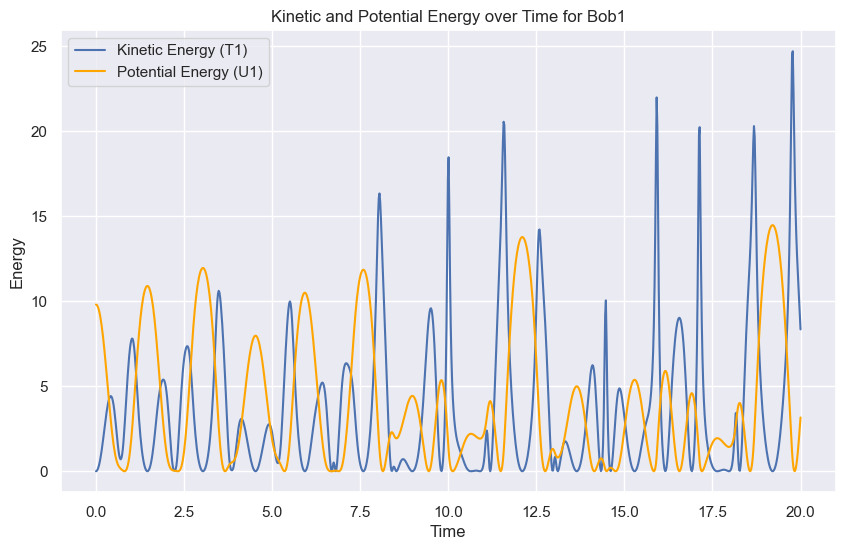

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_values, y=T1_values, label='Kinetic Energy (T1)')
sns.lineplot(x=time_values, y=U1_values, label='Potential Energy (U1)', color='orange')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Kinetic and Potential Energy over Time for Bob1')
plt.legend()
plt.show()

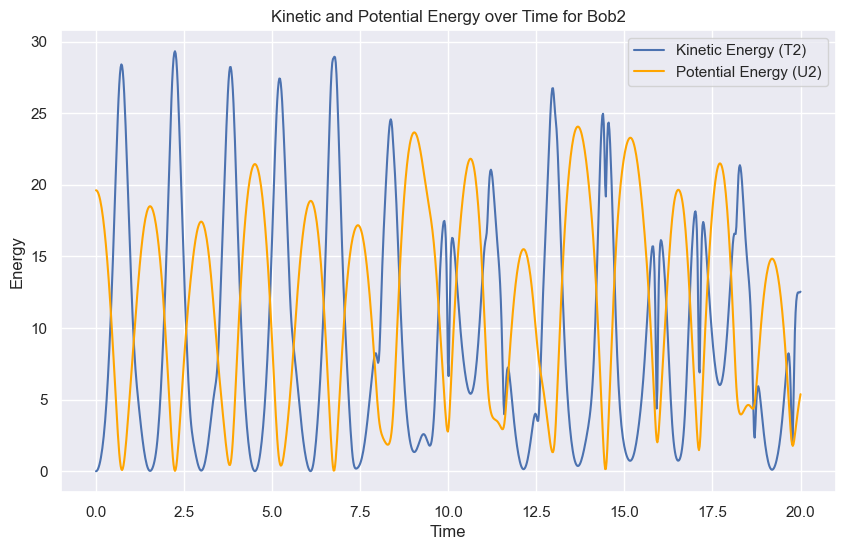

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_values, y=T2_values, label='Kinetic Energy (T2)')
sns.lineplot(x=time_values, y=U2_values, label='Potential Energy (U2)', color='orange')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Kinetic and Potential Energy over Time for Bob2')
plt.legend()
plt.show()